### ANÁLISE DE CLUSTER COM KMEANS EM PYTHON

#### CLUSTER NÃO-HIERARQUICO

OBJETIVO GERAL: AGRUPAR CLIENTES COM DESEMPENHOS SEMELHANTES

IDEIA: REDUZIR A DIMENSÃO DO PROBLEMA, EM VEZ DE ANALISAR 9.000 LINHAS, ANALISAR 3 OU 4 GRUPOS, BUSCANDO FACILITAR O ENTENDIMENTOS DOS DIVERSOS CENÁRIOS

SOLUCAO: PARA CADA CENARIO, UMA ESTRATEGIA

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
sns.set_style('whitegrid')

In [2]:
#carregando os dados
dados  = pd.read_csv('mkt_share.csv',
                     sep=';',
                     decimal=',',
                    names=['cliente',
                          'mkt1',
                          'mkt2',
                          'mkt3',
                          'mkt4',
                          'mkt5'],
                    dtype={'cliente':'str',
                          'mkt1':'float',
                          'mkt2':'float',
                          'mkt3':'float',
                          'mkt4':'float',
                          'mkt5':'float'})

In [3]:
#trazendo 3 amostras aleatórias para conhecer a estrutura do dataframe
dados.sample(5)

,cliente,mkt1,mkt2,mkt3,mkt4,mkt5
5537,18136650,0.00,0.00,0.00,0.0,0.00
1147,6012219,0.67,0.67,0.67,0.0,0.67
5890,6013719,0.44,0.33,0.67,0.0,0.00
9019,7027626,0.00,0.00,0.00,0.0,0.00
4538,18262950,0.67,0.00,0.67,0.0,0.00


In [4]:
#validando se não existem dados faltantes
dados.isnull().sum()

cliente    0
mkt1       0
mkt2       0
mkt3       0
mkt4       0
mkt5       0
dtype: int64

In [5]:
#transformando a coluna cliente em índice
dados.set_index('cliente',
               inplace=True)

In [6]:
#analisando máximos e mínimos
dados.describe()

,mkt1,mkt2,mkt3,mkt4,mkt5
count,9068.000000,9068.000000,9068.000000,9068.000000,9068.000000
mean,0.148047,0.122565,0.152351,0.011715,0.052202
std,0.254737,0.243106,0.265153,0.085876,0.159228
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.000000,0.220000,0.000000,0.000000
max,0.670000,0.670000,0.670000,0.670000,0.670000


Dados variam entre 0 e 0.7 em todas as variáveis

In [7]:
#Padronizaçao dos dados
metodo = MinMaxScaler()
dados_padronizados = pd.DataFrame(metodo.fit_transform(dados), 
                                  index=dados.index, 
                                  columns=dados.columns)

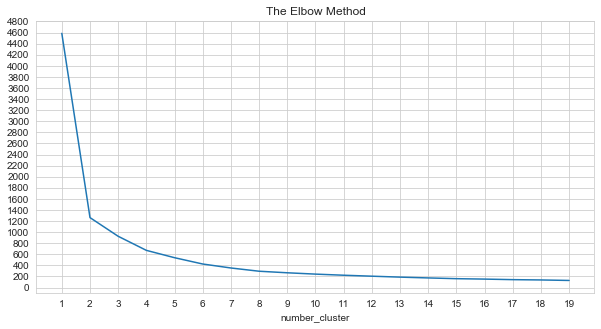

In [8]:
#Visualizando o metodo elbow para determinar o número ideal de cluster
wcss = []

for i in range(1,20):
    cluster = KMeans(n_clusters=i)
    cluster.fit(dados_padronizados)
    wcss.append(cluster.inertia_)
    
plt.figure(figsize=(10,5))
plt.xticks(np.arange(1,21,1))
plt.yticks(np.arange(0,5000,200))
plt.xlabel('number_cluster')
plt.title('The Elbow Method')
plt.plot(range(1,20), wcss)
plt.show()

2 Grupos reduzem bastante a variabilidade intragrupo, porém vamos trabalhar com 3 cluster nesta situação

In [50]:
#definindo o modelo com 3 cluster
modelo = KMeans(n_clusters=3,
                init= 'k-means++')
#aplicando os dados
cluster = modelo.fit_predict(dados_padronizados)

#adicionando a coluna cluster no dataframe
dados['cluster'] = cluster

#agrupando os dados pelo cluster e trazendo o desempenho médio de cada grupo

clusters = round(dados.pivot_table(index='cluster', 
                                   values=['mkt1',
                                           'mkt2',
                                           'mkt3',
                                           'mkt4'],
                                   aggfunc='mean'), 3)

#adicionando a quantidade de clientes em cada grupo
clusters['Quantidade_clientes'] = pd.Series([0,0,0,0])

lista = []
for i in clusters.index:
    lista.append(len(dados[dados['cluster']==i]))
    

clusters['Quantidade_clientes'] = pd.Series(lista)
clusters

,mkt1,mkt2,mkt3,mkt4,Quantidade_clientes
cluster,,,,,
0,0.005,0.005,0.004,0.001,6667
1,0.573,0.623,0.558,0.043,1624
2,0.490,0.088,0.578,0.040,777


A ideia do exercício é identificar os diferentes cenários formados pelo conjunto de dados.

Concluimos que existe um grupo em que os clientes estão com baixo desempenho em todos os market_share;

outro grupo em que estão com índices mais baixos no mkt2 e mkt4, portanto poderiam desenvolver novas oportunidades nessas áreas de atuaçao;

outro grupo em que estão com baixo índice somente no mkt4;

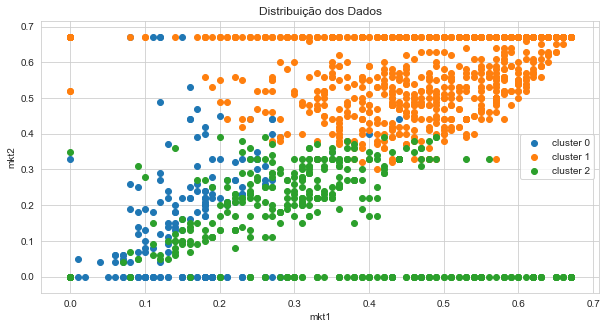

In [52]:
plt.figure(figsize=(10,5))
plt.title('Distribuição dos Dados')
plt.scatter(dados[dados['cluster']==0]['mkt1'].values,
            dados[dados['cluster']==0]['mkt2'].values, 
            label= 'cluster 0')
plt.scatter(dados[dados['cluster']==1]['mkt1'].values, 
            dados[dados['cluster']==1]['mkt2'].values,
            label= 'cluster 1')
plt.scatter(dados[dados['cluster']==2]['mkt1'].values, 
            dados[dados['cluster']==2]['mkt2'].values,
            label= 'cluster 2')
plt.xlabel('mkt1')
plt.ylabel('mkt2')
plt.legend()
plt.show()

In [10]:
#criando relatório segmentado de clientes e exportando para excel
cluster0 = dados[dados['cluster']==0]
cluster0.to_excel('cluster_0.xlsx')

cluster1 = dados[dados['cluster']==1]
cluster1.to_excel('cluster_1.xlsx')

cluster2 = dados[dados['cluster']==2]
cluster2.to_excel('cluster_2.xlsx')